In [1]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Load Cleaned data

In [2]:
imported_data = pd.read_csv("clean_data.csv", index_col=False)
imported_data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.196854,0.412477,0.068097,0.037740,0.112390,0.129946,0.138870,0.475273,0.542878,...,0.016267,0.025229,0.071730,0.085824,0.034172,0.766779,0.843206,0.021204,0.127588,0.008002
std,0.279766,0.076737,0.492281,0.251912,0.190567,0.265028,0.265175,0.345812,0.499389,0.297063,...,0.126499,0.156819,0.258041,0.280104,0.181671,0.422883,0.363607,0.144065,0.333631,0.089095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.144996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.184957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583333,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.234215,1.000000,0.000000,0.000000,0.066667,0.100000,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data Features Selection

In [3]:
X = imported_data.iloc[: , 1:imported_data.shape[1]]
Y = imported_data.iloc[: , 0]

# Divide data to train, test and validation
### With ratios 60% (train) , 20% (test) , 20% (validation)

In [6]:
X_train, X, y_train, Y = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X , Y, test_size = 0.5, stratify=Y, random_state=0)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

print()
print("y_train Values: \n{}".format(y_train.value_counts()))
print("y_test Values: \n{}".format(y_test.value_counts()))
print("y_val Values: \n{}".format(y_val.value_counts()))

X_train shape: (76750, 25)
y_train shape: (76750,)
X_test shape: (25584, 25)
y_test shape: (25584,)
X_val shape: (25584, 25)
y_val shape: (25584,)

y_train Values: 
0.0    70181
1.0     6569
Name: HeartDisease, dtype: int64
y_test Values: 
0.0    23394
1.0     2190
Name: HeartDisease, dtype: int64
y_val Values: 
0.0    23394
1.0     2190
Name: HeartDisease, dtype: int64


# Baseline (before oversampling)
Using most frequent

In [7]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)
accuracy = dummy_clf.score(X_train, y_train)
print("Dummy Classifier Accuracy: {} %".format(accuracy*100))

Dummy Classifier Accuracy: 91.44104234527687 %


### Oversamling the data

In [14]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_train_over_sampled, y_train_over_sampled = ros.fit_resample(X_train, y_train)


# Save data to disk
oversampled_data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)
oversampled_data.to_csv("Data/oversampled_train_data.csv", index=False, header=False)

print("X_train_over_sampled shape: {}".format(X_train_over_sampled.shape))
print("y_train_over_sampled shape: {}".format(y_train_over_sampled.shape))
print()
print("y_train_over_sampled Values: \n{}".format(y_train_over_sampled.value_counts()))

X_train_over_sampled shape: (140362, 25)
y_train_over_sampled shape: (140362,)

y_train_over_sampled Values: 
0.0    70181
1.0    70181
Name: HeartDisease, dtype: int64


In [15]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_val, y_val)
X_val_over_sampled, y_val_over_sampled = ros.fit_resample(X_val, y_val)

# Save data to disk
oversampled_data = pd.concat([X_val_over_sampled, y_val_over_sampled], axis=1)
oversampled_data.to_csv("Data/oversampled_val_data.csv", index=False, header=False)

print("X_val_over_sampled shape: {}".format(X_val_over_sampled.shape))
print("y_val_over_sampled shape: {}".format(y_val_over_sampled.shape))
print()
print("y_val_over_sampled Values: \n{}".format(y_val_over_sampled.value_counts()))

X_val_over_sampled shape: (46788, 25)
y_val_over_sampled shape: (46788,)

y_val_over_sampled Values: 
0.0    23394
1.0    23394
Name: HeartDisease, dtype: int64


In [17]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_test, y_test)
X_test_over_sampled, y_test_over_sampled = ros.fit_resample(X_test, y_test)

# Save data to disk
oversampled_data = pd.concat([X_test_over_sampled, y_test_over_sampled], axis=1)
oversampled_data.to_csv("Data/oversampled_test_data.csv", index=False, header=False)


print("X_test_over_sampled shape: {}".format(X_test_over_sampled.shape))
print("y_val_over_sampled shape: {}".format(y_test_over_sampled.shape))
print()
print("y_val_over_sampled Values: \n{}".format(y_test_over_sampled.value_counts()))

X_test_over_sampled shape: (46788, 25)
y_val_over_sampled shape: (46788,)

y_val_over_sampled Values: 
0.0    23394
1.0    23394
Name: HeartDisease, dtype: int64


# Baseline (After oversampling)
Using most frequent

In [10]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_over_sampled, y_train_over_sampled)
dummy_clf.predict(X_train_over_sampled)
accuracy = dummy_clf.score(X_train_over_sampled, y_train_over_sampled)
print("Dummy Classifier Accuracy: {} %".format(accuracy*100))

Dummy Classifier Accuracy: 50.0 %


## Decision Tree

In [11]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = model.predict(X_val_over_sampled)
print("Accuracy:",metrics.accuracy_score(y_val_over_sampled, y_pred))

Accuracy: 0.7202445071385826


## Logestic Regression

In [12]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = logreg.predict(X_val_over_sampled)

Text(0.5, 257.44, 'Predicted label')

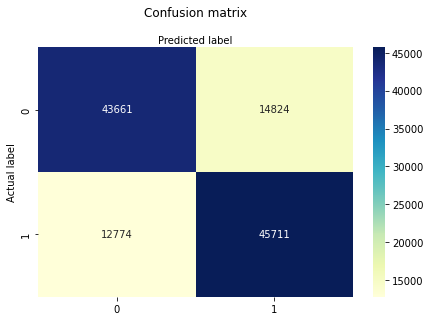

In [13]:
cnf_matrix = metrics.confusion_matrix(y_val_over_sampled, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_val_over_sampled, y_pred))
print("Precision:",metrics.precision_score(y_val_over_sampled, y_pred))
print("Recall:",metrics.recall_score(y_val_over_sampled, y_pred))

Accuracy: 0.7640591604684962
Precision: 0.7551168745353928
Recall: 0.7815850218004616


## Bayes Classifier

In [15]:
gnb = GaussianNB()
gnb.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = gnb.predict(X_val_over_sampled)
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_over_sampled, y_pred))

Accuracy: 0.7056852184320767


## Linear SVM

In [16]:
linsvc = LinearSVC(C=1,max_iter=1000)
# Use grid search to find the best model and parameters for Linear SVM
parameters = {'C':[0.01,0.1,1,10,100]}
grid_search = GridSearchCV(linsvc, parameters)
grid_search.fit(X_train_over_sampled, y_train_over_sampled)
print("Best score:",grid_search.best_score_)
print("Best parameters:",grid_search.best_params_)

c:\Users\hmada\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hmada\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hmada\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hmada\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\hmada\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

Best score: 0.7619163004000138
Best parameters: {'C': 0.1}


c:\Users\hmada\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
